Elad Inbar - 205358211 Ido Livne - 203834733 Chai Hadad - 209268135

# **Import**

In [ ]:
import csv
import torch
from torch.utils.data import Dataset, DataLoader
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

# **Initialize Runtime**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Google Colab
!cp -r "/content/drive/My Drive/Deep Learning/Assignment 2/PAMAP2_Dataset" "/content"

In [ ]:
# Google Colab
!mkdir PAMAP2_Dataset/training
!mkdir PAMAP2_Dataset/validation
!mkdir PAMAP2_Dataset/testing

# **Define dataset paths**

In [ ]:
protocol_path = 'PAMAP2_Dataset/Protocol/'
optional_path = 'PAMAP2_Dataset/Optional/'

protocol_dir = sorted(os.listdir(protocol_path))
optional_dir = sorted(os.listdir(optional_path))

# **Exploratory Data Analysis**

After downloading the dataset we can check how much data we're working with:

In [ ]:
# amount of activities (not distinct) per subject to classify
# amount of activities to classify in total

In [ ]:
optional_subjects = ["subject101", "subject105", "subject106", "subject108", "subject109"]
protocol_subjects = ["subject101", "subject102", "subject103", "subject104", "subject105", "subject106", "subject107", "subject108", "subject109"]

In [ ]:
# protocol_dat_content = [[i.strip().split() for i in open(protocol_path + protocol_subject + ".dat").readlines()] for protocol_subject in protocol_subjects]

In [ ]:
# optional_dat_content = [[i.strip().split() for i in open(optional_path + optional_subject + ".dat").readlines()] for optional_subject in optional_subjects]   

In [ ]:
# for i in range(9):
#     with open(protocol_path + protocol_subjects[i] + ".csv", "w") as file:
#         writer = csv.writer(file)
#         writer.writerows(protocol_dat_content[i])

In [ ]:
# for i in range(5):
#     with open(optional_path + optional_subjects[i] + ".csv", "w") as file:
#         writer = csv.writer(file)
#         writer.writerows(optional_dat_content[i])

In [ ]:
for idx, protocol_subject in enumerate(protocol_subjects):
  input = open(protocol_path + protocol_subject + ".csv", 'r')
  output = open(protocol_path + protocol_subject + "_edited.csv", 'w')
  writer = csv.writer(output)
  for row in csv.reader(input):
    if row[1]!='0':
        writer.writerow((row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10],row[11],row[12],row[13],row[14],row[15],row[20],row[21],row[22],row[23],row[24],row[25],row[26],row[27],row[28],row[29],row[30],row[31],row[32],row[37],row[38],row[39],row[40], row[41],row[42],row[43],row[44],row[45],row[46],row[47],row[48],row[49]))
  input.close()
  output.close()

In [57]:
for idx, optional_subject in enumerate(optional_subjects):
  input = open(protocol_path + protocol_subject + ".csv", 'r')
  output = open(protocol_path + protocol_subject + "_edited.csv", 'w')
  writer = csv.writer(output)
  for row in csv.reader(input):
    if row[1]!='0':
        writer.writerow((row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10],row[11],row[12],row[13],row[14],row[15],row[20],row[21],row[22],row[23],row[24],row[25],row[26],row[27],row[28],row[29],row[30],row[31],row[32],row[37],row[38],row[39],row[40], row[41],row[42],row[43],row[44],row[45],row[46],row[47],row[48],row[49]))
  input.close()
  output.close()

In [ ]:
columns_to_keep = ['timestamp (s)', 'activityID', 'heart rate (bpm)'] # (1, 2, 3)

# 4-20 (3-19)
columns_to_keep += ['IMU hand temperature (°C)'] # 1 (3)
columns_to_keep += ['IMU hand 3D-acceleration data (ms-2), scale +-16g ' + str(i + 1) for i in range(3)] # 2-4 (4-6)
columns_to_keep += ['IMU hand 3D-acceleration data (ms-2), scale +-6g ' + str(i + 1) for i in range(3)] # 5-7 (7-9)
columns_to_keep += ['IMU hand 3D-gyroscope data (rad/s) ' + str(i + 1) for i in range(3)] # 8-10 (10-12)
columns_to_keep += ['IMU hand 3D-magnetometer (µT) ' + str(i + 1) for i in range(3)] # 11-13 (13-15)

# 21-37 (20-36)
columns_to_keep += ['IMU chest temperature (°C)'] # 1 (20)
columns_to_keep += ['IMU chest 3D-acceleration data (ms-2), scale +-16g ' + str(i + 1) for i in range(3)] # 2-4 (21-23)
columns_to_keep += ['IMU chest 3D-acceleration data (ms-2), scale +-6g ' + str(i + 1) for i in range(3)] # 5-7 (24-26)
columns_to_keep += ['IMU chest 3D-gyroscope data (rad/s) ' + str(i + 1) for i in range(3)] # 8-10 (27-29)
columns_to_keep += ['IMU chest 3D-magnetometer (µT) ' + str(i + 1) for i in range(3)] # 11-13 (30-32)

# 38-54 (37-53)
columns_to_keep += ['IMU ankle temperature (°C)'] # 1 (37)
columns_to_keep += ['IMU ankle 3D-acceleration data (ms-2), scale +-16g ' + str(i + 1) for i in range(3)] # 2-4 (38-40)
columns_to_keep += ['IMU ankle 3D-acceleration data (ms-2), scale +-6g ' + str(i + 1) for i in range(3)] # 5-7 (41-43)
columns_to_keep += ['IMU ankle 3D-gyroscope data (rad/s) ' + str(i + 1) for i in range(3)] # 8-10 (44-46)
columns_to_keep += ['IMU ankle 3D-magnetometer (µT) ' + str(i + 1) for i in range(3)] # 11-13 (47-49)

In [58]:
protocol_dataframes = {}
for protocol_subject in protocol_subjects:
    protocol_dataframes[protocol_subject] = pd.read_csv(protocol_path + protocol_subject + "_edited.csv", names=columns_to_keep)

In [59]:
optional_dataframes = {}
for optional_subject in optional_subjects:
    optional_dataframes[optional_subject] = pd.read_csv(optional_path + optional_subject + "_edited.csv", names=columns_to_keep)

Remove unused 'orientation' columns per sensor (hand, chest and ankle)

In [33]:
columns_to_remove = ['IMU hand orientation ' + str(i + 1) for i in range(4)] # 14-17 (16-19)
columns_to_remove += ['IMU chest orientation ' + str(i + 1) for i in range(4)] # 14-17 (33-36)
columns_to_remove += ['IMU ankle orientation ' + str(i + 1) for i in range(4)] # 14-17 (50-53)

In [36]:
for protocol_subject in protocol_subjects:
  protocol_dataframes[protocol_subject].drop(columns_to_remove, axis=1, inplace=True)

for optional_subject in optional_subjects:
  optional_dataframes[optional_subject].drop(columns_to_remove, axis=1, inplace=True)

In [64]:
columns_to_remove = [[0, 1]]
df = protocol_dataframes["subject101"]
df.drop(df.columns[columns_to_remove], axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



,heart rate (bpm),IMU hand temperature (°C),"IMU hand 3D-acceleration data (ms-2), scale +-16g 1","IMU hand 3D-acceleration data (ms-2), scale +-16g 2","IMU hand 3D-acceleration data (ms-2), scale +-16g 3","IMU hand 3D-acceleration data (ms-2), scale +-6g 1","IMU hand 3D-acceleration data (ms-2), scale +-6g 2","IMU hand 3D-acceleration data (ms-2), scale +-6g 3",IMU hand 3D-gyroscope data (rad/s) 1,IMU hand 3D-gyroscope data (rad/s) 2,...,IMU ankle 3D-gyroscope data (rad/s) 1,IMU ankle 3D-gyroscope data (rad/s) 2,IMU ankle 3D-gyroscope data (rad/s) 3,IMU ankle 3D-magnetometer (µT) 1,IMU ankle 3D-magnetometer (µT) 2,IMU ankle 3D-magnetometer (µT) 3,IMU ankle orientation 1,IMU ankle orientation 2,IMU ankle orientation 3,IMU ankle orientation 4
0,NaN,30.3750,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,...,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0
1,NaN,30.3750,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,...,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0
2,NaN,30.3750,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,...,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0
3,NaN,30.3750,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,...,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0
4,100.0,30.3750,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,...,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249952,NaN,30.1875,2.51550,7.02650,5.78869,2.44962,7.57075,5.77337,-0.469234,-0.065244,...,-0.018273,0.000864,0.018507,-56.3324,-29.6397,34.1311,1.0,0.0,0.0,0.0
249953,NaN,30.1875,2.50643,6.30465,5.67552,2.53332,6.84517,5.69937,-0.512432,-0.116526,...,-0.037873,-0.022418,-0.017999,-55.7786,-29.1093,34.2560,1.0,0.0,0.0,0.0
249954,NaN,30.1875,2.54102,5.84908,5.67758,2.55875,6.18058,5.80651,-0.458393,-0.041476,...,0.059283,-0.050002,0.005630,-55.5371,-29.5769,35.6106,1.0,0.0,0.0,0.0
249955,NaN,30.1875,2.65866,5.88715,5.79468,2.57228,5.87855,5.92796,-0.418556,-0.001280,...,0.049326,-0.016209,0.016162,-56.4328,-30.1943,34.6211,1.0,0.0,0.0,0.0


In [ ]:
def count_activities_per_subject(subject_df):
    acts_values_unfiltered = subject_df['activityID'].tolist()
    acts_values = []
    for i in range(len(acts_values_unfiltered)):
        if i == 0 or acts_values_unfiltered[i-1] != acts_values_unfiltered[i] :
            acts_values.append(acts_values_unfiltered[i]) 
    acts_set = set(acts_values)
    res = {}
    for act in acts_set:
        if act != 0:
            res[act] = 0
    for act in acts_values:
        if act != 0:
            res[act] = res[act] + 1
    return res

In [ ]:
activity_count = {}
for protocol_subject in protocol_subjects:
    temp_acts = count_activities_per_subject(protocol_dataframes[protocol_subject])
    for key in temp_acts.keys():
        if key in activity_count.keys():
            activity_count[key] += temp_acts[key]
        else:
            activity_count[key] = temp_acts[key]

In [ ]:
activity_count

{1: 8, 2: 8, 3: 8, 4: 8, 5: 7, 6: 7, 7: 7, 12: 16, 13: 17, 16: 8, 17: 8, 24: 6}

In [ ]:
def get_activity_name_by_id(id):
    id_to_names = {}
    id_to_names[1] = 'lying'
    id_to_names[2] = 'sitting'
    id_to_names[3] = 'standing'
    id_to_names[4] = 'walking'
    id_to_names[5] = 'running'
    id_to_names[6] = 'cycling'
    id_to_names[7] = 'Nordic walking'
    id_to_names[9] = 'watching TV'
    id_to_names[10] = 'computer work'
    id_to_names[11] = 'car driving'
    id_to_names[12] = 'ascending stairs'
    id_to_names[13] = 'descending stairs'
    id_to_names[16] = 'vacuum cleaning'
    id_to_names[17] = 'ironing'
    id_to_names[18] = 'folding laundry'
    id_to_names[19] = 'house cleaning'
    id_to_names[20] = 'playing soccer'
    id_to_names[24] = 'rope jumping'
    id_to_names[0] = 'other'
    return id_to_names[id]

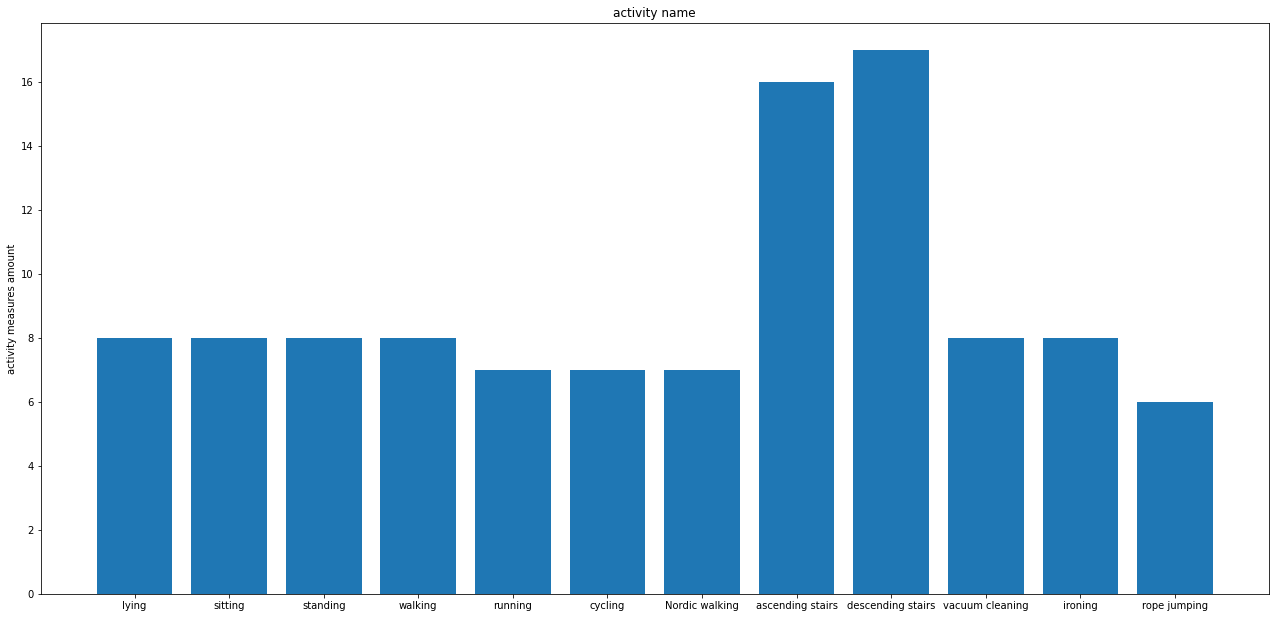

In [ ]:
values = activity_count

keys_lst = []
count_lst = []
for key in values.keys():
    keys_lst.append(key)
    count_lst.append(values[key])

activity_names = [get_activity_name_by_id(act_id) for act_id in keys_lst]

fig, ax = plt.subplots()
fig.set_size_inches(22, 10.5)

bar_labels = keys_lst
ax.bar(activity_names, count_lst)
ax.set_ylabel('activity measures amount')
ax.set_title('activity name')


plt.show()

# show optional as well

In [ ]:
def get_subject_activity(df, activityID):
    return df[df['activityID'] == activityID]

activity_values_lsts = [list(filter (lambda value: not math.isnan(value), (get_subject_activity(df, activityID=5)['heart rate (bpm)'].tolist()))) for df in protocol_dataframes.values()]

In [ ]:
set(activity_values_lsts[0])

In [ ]:
# plotly plot
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(x=get_subject_activity(protocol_dataframes["subject101"], 5)['timestamp (s)'],
                            y=get_subject_activity(protocol_dataframes["subject101"], 5)['heart rate (bpm)'])])

fig.show()

# values = activity_count

# keys_lst = []
# count_lst = []
# for key in values.keys():
#     keys_lst.append(key)
#     count_lst.append(values[key])

# activity_names = [get_activity_name_by_id(act_id) for act_id in keys_lst]

# fig, ax = plt.subplots(9, 1)
# fig.set_size_inches(22, 10.5)

# ax.bar(activity_names, count_lst)
# ax.set_ylabel('heart rate (bpm)')
# ax.set_xlabel('time')
# ax.set_title('Subject heart rate during running')


# plt.show()

2 self-supervised tasks we can pretrain our models on
1. Predict the upcoming section
2. Predict the subject using the signal

# Pre-Processing

## Create the dataset object

In [ ]:
class activity_dataset(Dataset):
    def __init__(self, path_to_csv, transform=None, target_transform=None):
        self.path = path_to_csv
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        data = pd.read_csv(self.labels_path)
        return data.size
    
    def __getitem__(self, subject):
        label = csv.reader(open(self.path_to_csv + subject + "_edited.csv", 'w'))
        if self.transform:
            im = self.transform(im)
        if self.target_transform:
            label = self.target_transform(label)
        return im.astype(np.float32).copy(), label

# Forming the neural network